## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

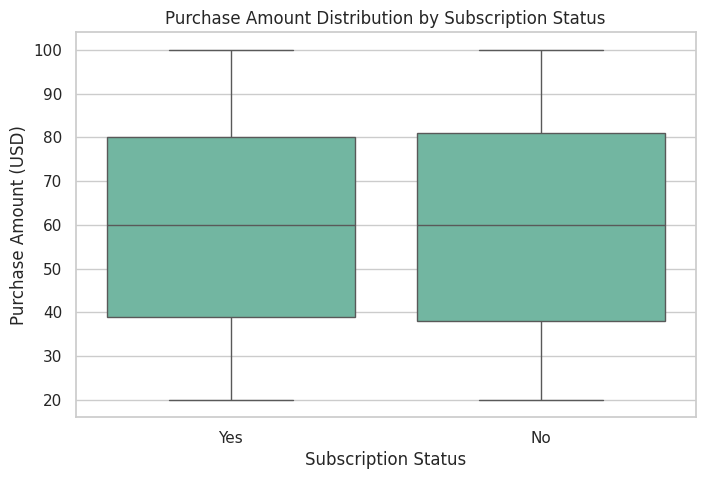

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Global styling
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,5)

sns.boxplot(
    x="Subscription Status",
    y="Purchase Amount (USD)",
    data=df
)

plt.title("Purchase Amount Distribution by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Purchase Amount (USD)")
plt.show()


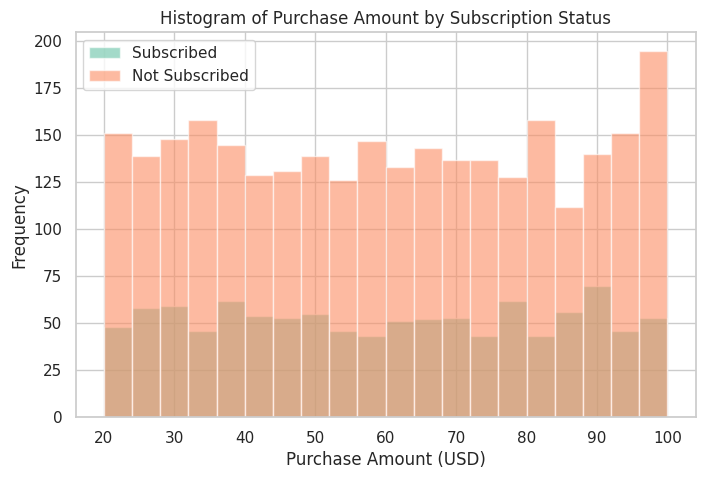

In [ ]:
subscribed = df[df["Subscription Status"] == "Yes"]["Purchase Amount (USD)"]
not_subscribed = df[df["Subscription Status"] == "No"]["Purchase Amount (USD)"]

plt.hist(subscribed, bins=20, alpha=0.6, label="Subscribed")
plt.hist(not_subscribed, bins=20, alpha=0.6, label="Not Subscribed")

plt.title("Histogram of Purchase Amount by Subscription Status")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


 The purchase amount distribution is very similar for subscribed and non-subscribed customers
 Both groups have nearly the same median and spread, with no clear difference or strong outliers between them

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

In [ ]:
payment_counts = df["Payment Method"].value_counts()
payment_counts

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


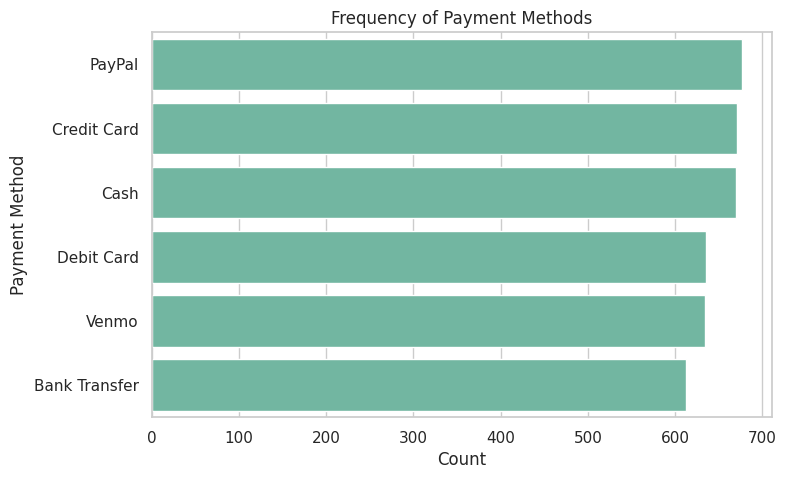

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
    y="Payment Method",
    data=df,
    order=payment_counts.index
)

plt.title("Frequency of Payment Methods")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()


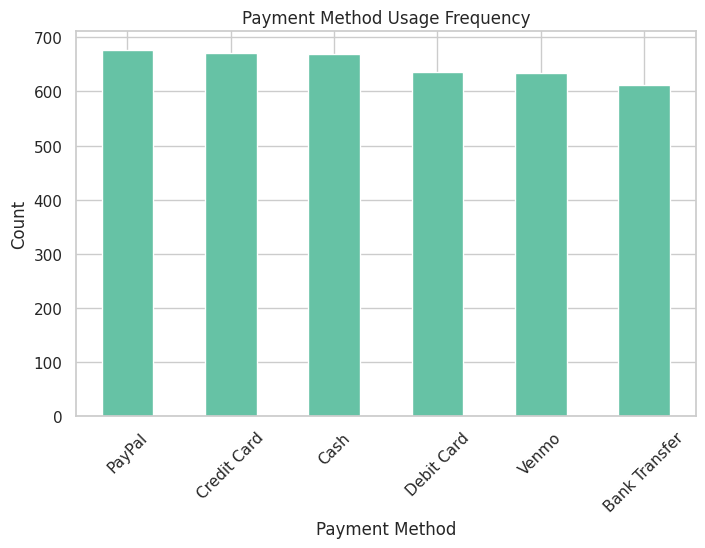

In [ ]:
plt.figure(figsize=(8,5))

payment_counts.plot(
    kind="bar"
)

plt.title("Payment Method Usage Frequency")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


All payment methods are used almost equally




### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

In [ ]:
gender_season_counts = df.groupby(["Season", "Gender"]).size().unstack()
gender_season_counts

Gender,Female,Male
Season,,
Fall,328,647
Spring,316,683
Summer,298,657
Winter,306,665


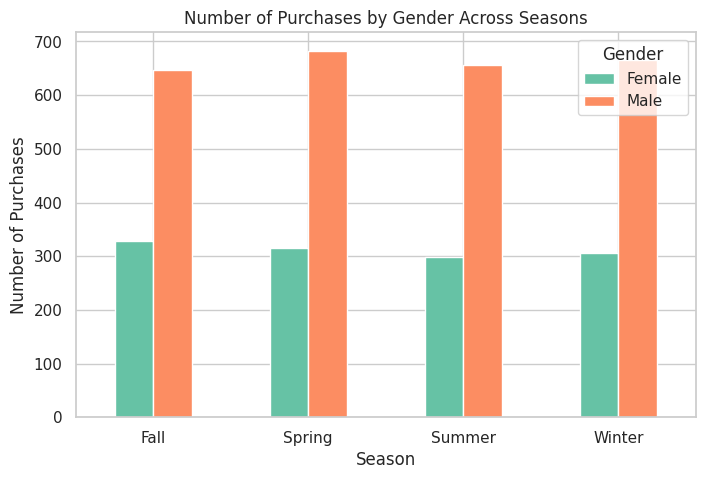

In [ ]:
gender_season_counts.plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Number of Purchases by Gender Across Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)
plt.show()

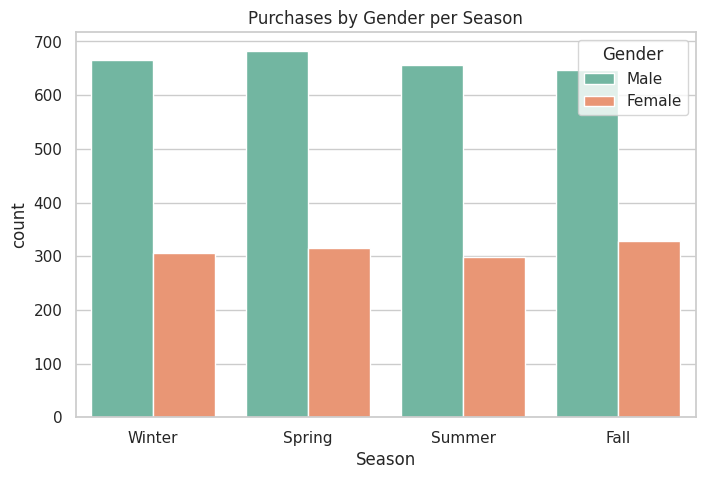

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    x="Season",
    hue="Gender",
    data=df
)

plt.title("Purchases by Gender per Season")
plt.show()


Males make about twice as many purchases as females across all seasons

The pattern stays consistent throughout the year with no seasonal preference for either gender

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

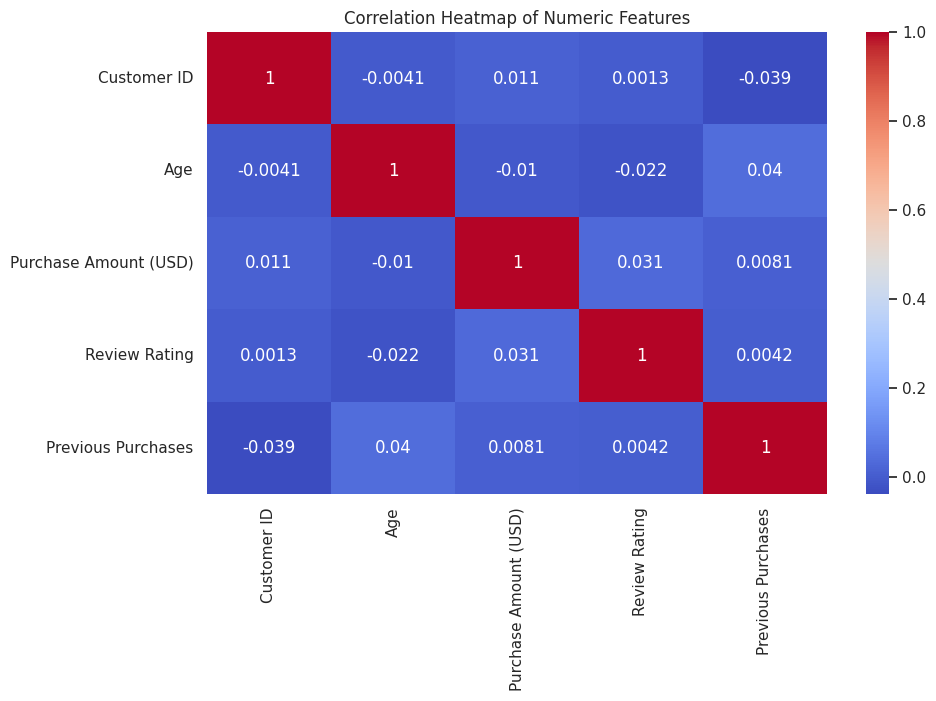

In [ ]:
plt.figure(figsize=(10,6))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


All numeric variables show extremely weak correlations close to zero

Previous Purchases, Purchase Amount, and Review Rating have no meaningful relationships with each other or with Age

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

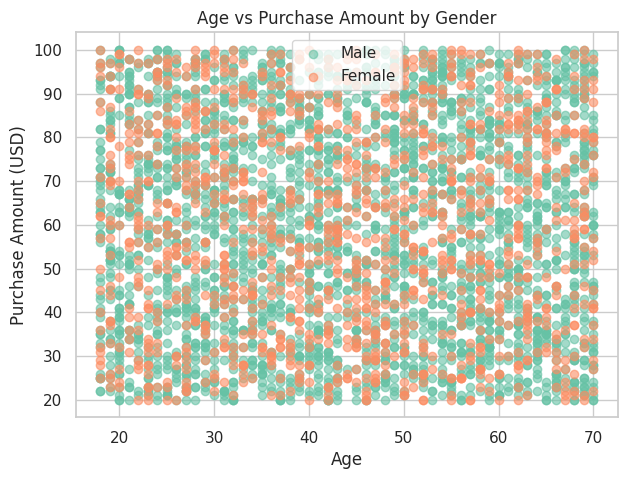

In [ ]:
plt.figure(figsize=(7,5))

for gender in df["Gender"].unique():
    subset = df[df["Gender"] == gender]
    plt.scatter(
        subset["Age"],
        subset["Purchase Amount (USD)"],
        label=gender,
        alpha=0.6
    )

plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Age vs Purchase Amount by Gender")
plt.legend()
plt.show()


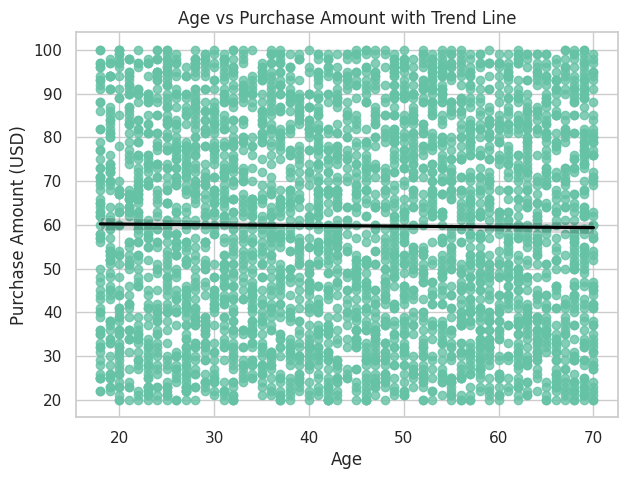

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(
    x="Age",
    y="Purchase Amount (USD)",
    data=df,
    scatter=True,
    line_kws={"color": "black"}
)

plt.title("Age vs Purchase Amount with Trend Line")
plt.show()


Age has no relationship with purchase amount

Customers of all ages spend similar amounts, and the flat trend line confirms there's no correlation between age and spending

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

In [ ]:
import pandas as pd
rating_pivot = pd.pivot_table(
    df,
    values="Review Rating",
    index="Category",
    columns="Size",
    aggfunc="mean"
)

rating_pivot


Size,L,M,S,XL
Category,,,,
Accessories,3.736808,3.766192,3.785652,3.819858
Clothing,3.747193,3.692159,3.762676,3.729897
Footwear,3.797093,3.711236,3.865591,3.986567
Outerwear,3.751613,3.693243,3.858929,3.792593


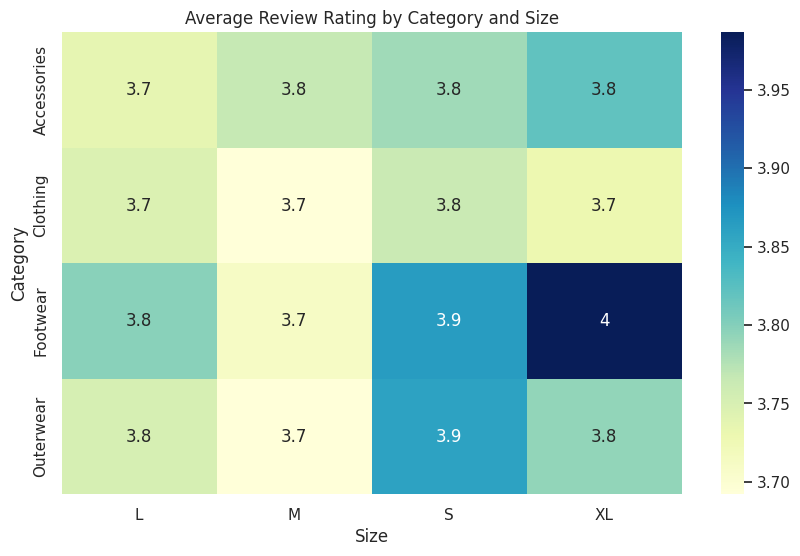

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(
    rating_pivot,
    annot=True,
    cmap="YlGnBu"
)

plt.title("Average Review Rating by Category and Size")
plt.show()


Review ratings are very consistent across all categories and sizes

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

In [ ]:
season_shipping_avg = df.groupby(
    ["Season", "Shipping Type"]
)["Purchase Amount (USD)"].mean().unstack()

season_shipping_avg


Shipping Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Season,,,,,,
Fall,61.928571,63.159763,60.660714,59.771930,61.380952,62.641379
Spring,58.157303,57.739884,61.682927,58.453333,56.522293,59.774011
Summer,60.089655,58.337931,60.474860,58.238411,56.903614,56.449704
Winter,63.186667,62.547170,58.810976,58.011364,58.901840,61.182390


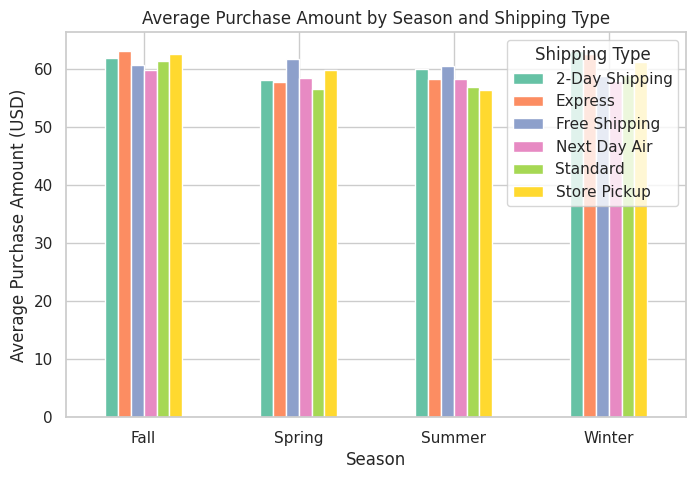

In [ ]:
season_shipping_avg.plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Average Purchase Amount by Season and Shipping Type")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=0)
plt.show()


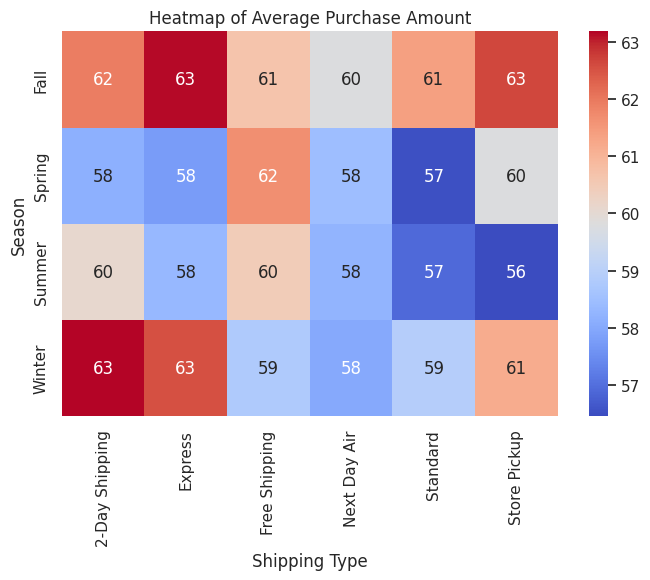

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(
    season_shipping_avg,
    annot=True,
    cmap="coolwarm"
)

plt.title("Heatmap of Average Purchase Amount")
plt.show()


Fall and Winter with 2-Day Shipping or Express show the highest average purchase amounts

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

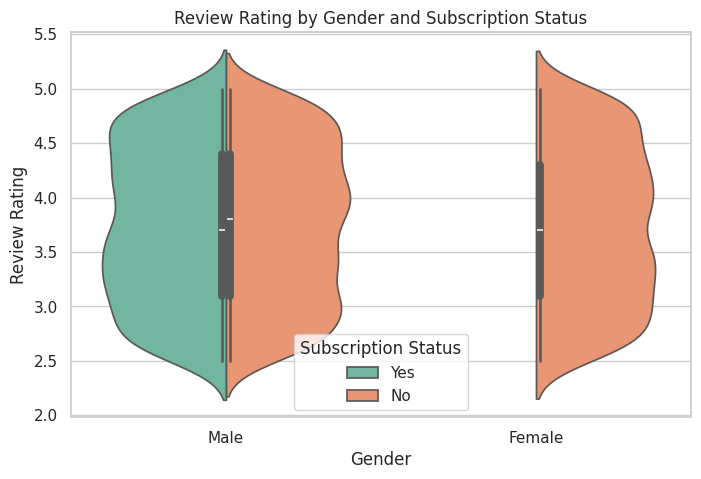

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(
    x="Gender",
    y="Review Rating",
    hue="Subscription Status",
    data=df,
    split=True
)

plt.title("Review Rating by Gender and Subscription Status")
plt.show()


Review ratings are nearly identical across all groups

Males show similar distributions whether subscribed or not

Females are all non-subscribed and give ratings in the same range as males, showing consistent satisfaction levels across the dataset

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [ ]:
top_items = (
    df.groupby("Item Purchased")["Purchase Amount (USD)"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_items


,Purchase Amount (USD)
Item Purchased,
Blouse,10410
Shirt,10332
Dress,10320
Pants,10090
Jewelry,10010


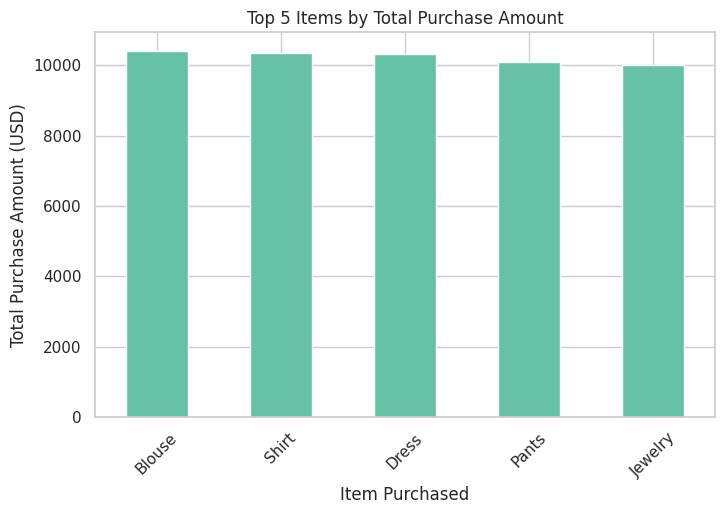

In [ ]:
plt.figure(figsize=(8,5))
top_items.plot(kind="bar")

plt.title("Top 5 Items by Total Purchase Amount")
plt.ylabel("Total Purchase Amount (USD)")
plt.xticks(rotation=45)
plt.show()


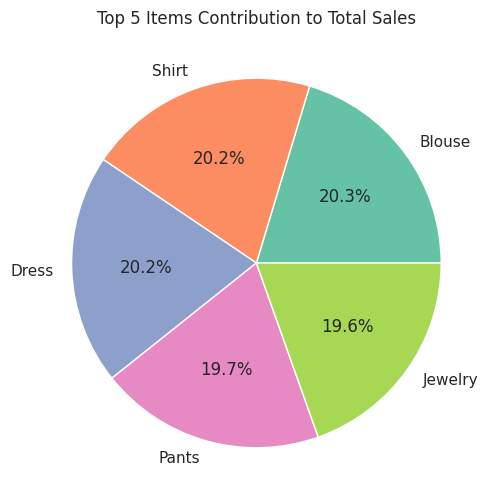

In [ ]:
plt.figure(figsize=(6,6))
top_items.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Top 5 Items Contribution to Total Sales")
plt.show()


The top 5 items contribute almost equally to total purchase amount

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [ ]:
location_avg = (
    df.groupby("Location")["Purchase Amount (USD)"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

top_locations = df[df["Location"].isin(location_avg.index)]


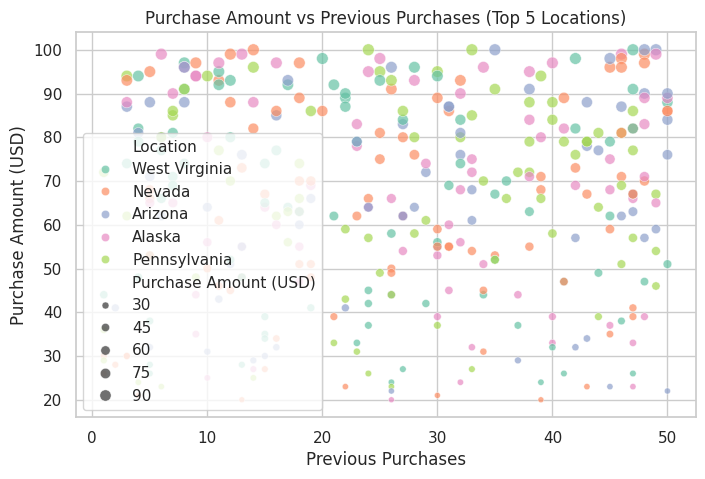

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=top_locations,
    x="Previous Purchases",
    y="Purchase Amount (USD)",
    size="Purchase Amount (USD)",
    hue="Location",
    alpha=0.7
)

plt.title("Purchase Amount vs Previous Purchases (Top 5 Locations)")
plt.show()


There's no relationship between previous purchases and purchase amount in the top 5 locations

All locations show random scatter across all price ranges, indicating past buying behavior doesn't predict current spending

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

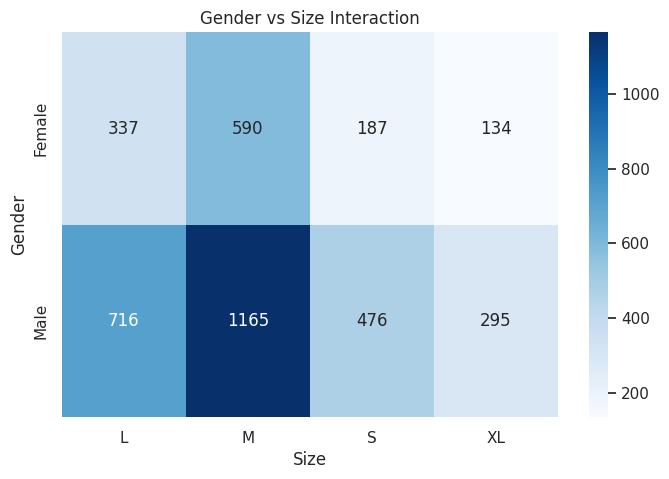

In [ ]:
gender_size_ct = pd.crosstab(df["Gender"], df["Size"])

plt.figure(figsize=(8,5))
sns.heatmap(
    gender_size_ct,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.title("Gender vs Size Interaction")
plt.show()


Males purchase significantly more items than females across all sizes

Medium size is most popular for both genders, while XL is least popular for both groups

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

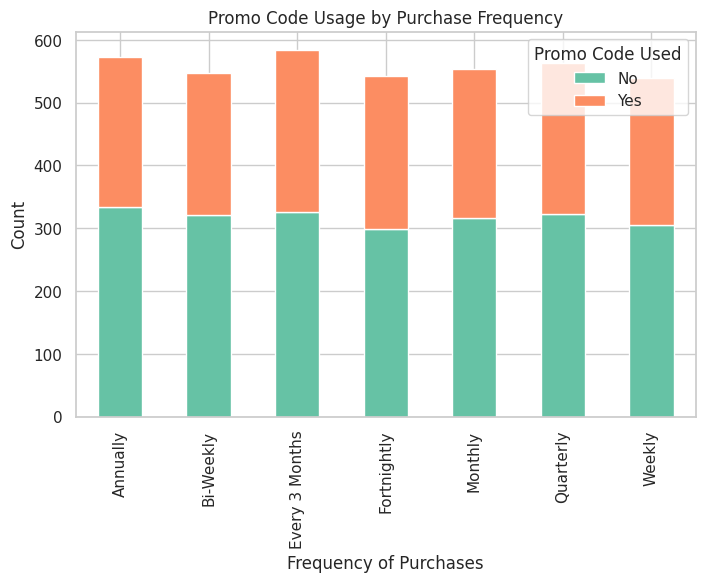

In [ ]:
freq_promo = pd.crosstab(
    df["Frequency of Purchases"],
    df["Promo Code Used"]
)

freq_promo.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5)
)

plt.title("Promo Code Usage by Purchase Frequency")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Count")
plt.show()


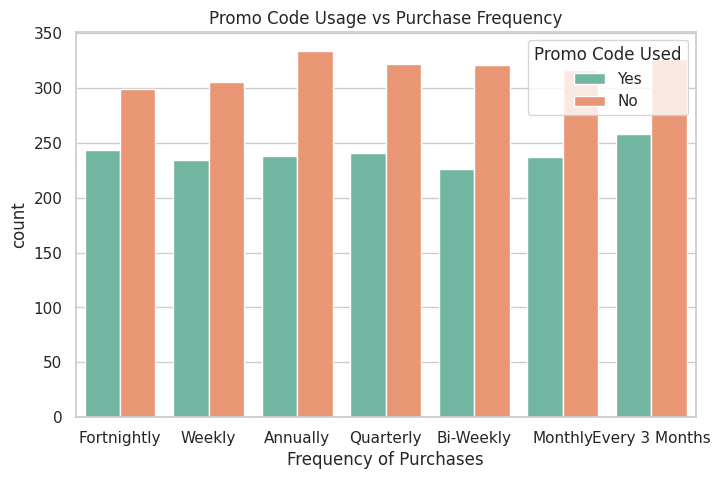

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    x="Frequency of Purchases",
    hue="Promo Code Used",
    data=df
)

plt.title("Promo Code Usage vs Purchase Frequency")
plt.show()


Promo code usage is similar across all purchase frequencies

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

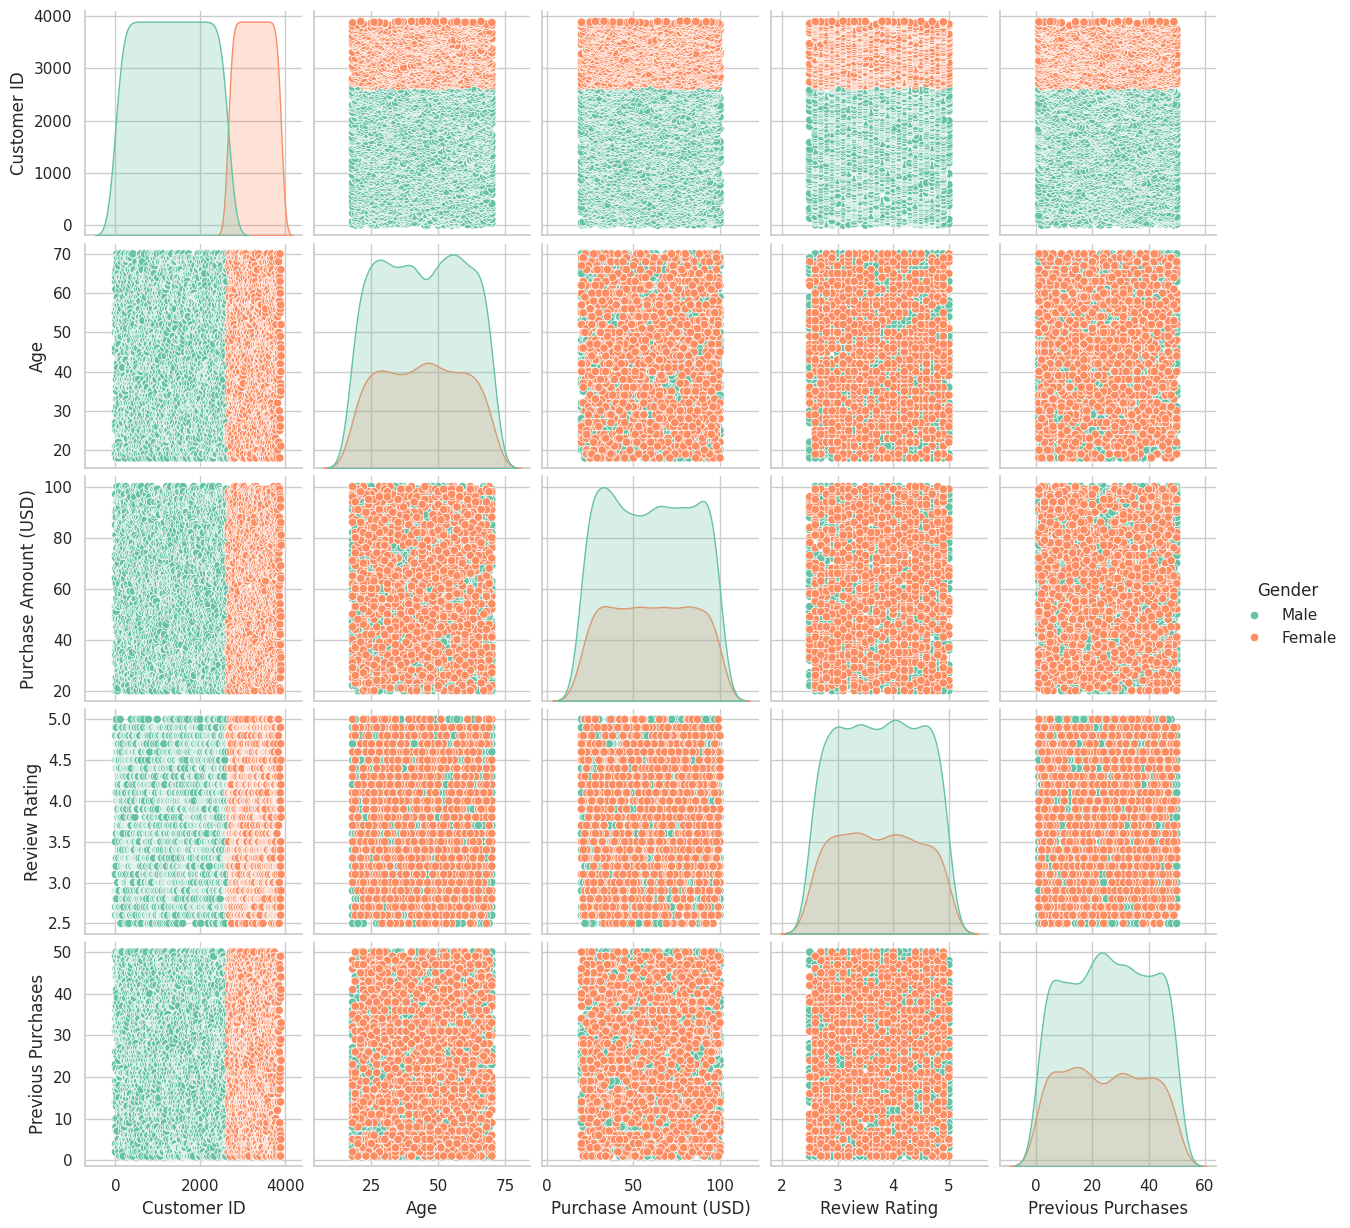

In [ ]:
sns.pairplot(
    df.select_dtypes(include="number").join(df["Gender"]),
    hue="Gender"
)
plt.show()


The pairplot confirms no strong correlations between any numeric variables

 All scatter plots show random patterns for both genders, with complete overlap between males and females across all variables
